<a href="https://colab.research.google.com/github/Qistina904/Qistina904/blob/main/ETH_prediction_using_SVR_ML_(py).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program attemos to predict the future price of ETH

In [ ]:
#import the libraries 
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the ETh data
from google.colab import files
files.upload()

Saving ETH-USD (6).csv to ETH-USD (6).csv


{'ETH-USD (6).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-06-02,2634.456055,2801.392334,2555.401367,2706.125000,2706.125000,27723267359\n2021-06-03,2708.376221,2891.254883,2667.684326,2855.126465,2855.126465,30038207402\n2021-06-04,2857.165527,2857.165527,2562.637451,2688.195068,2688.195068,34173841611\n2021-06-05,2691.619385,2817.484863,2558.233643,2630.576904,2630.576904,30496672724\n2021-06-06,2629.748779,2743.441162,2616.162354,2715.092773,2715.092773,25311639414\n2021-06-07,2713.047363,2845.185059,2583.995117,2590.263184,2590.263184,30600111277\n2021-06-08,2594.602295,2620.846191,2315.546631,2517.438721,2517.438721,41909736778\n2021-06-09,2510.199219,2625.070557,2412.197754,2608.267090,2608.267090,36075832186\n2021-06-10,2611.142578,2619.957764,2435.401611,2471.518555,2471.518555,28753626390\n2021-06-11,2472.858887,2495.414795,2326.869629,2353.768799,2353.768799,24832564195\n2021-06-12,2354.752197,2447.227783,2265.758057,2372.484375,2372.484375,25724364410\n2021-06-13,

In [ ]:
#Read in the data
df = pd.read_csv('ETH-USD (6).csv')
#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-06-02,2021-06-02,2634.456055,2801.392334,2555.401367,2706.125000,2706.125000,27723267359
2021-06-03,2021-06-03,2708.376221,2891.254883,2667.684326,2855.126465,2855.126465,30038207402
2021-06-04,2021-06-04,2857.165527,2857.165527,2562.637451,2688.195068,2688.195068,34173841611
2021-06-05,2021-06-05,2691.619385,2817.484863,2558.233643,2630.576904,2630.576904,30496672724
2021-06-06,2021-06-06,2629.748779,2743.441162,2616.162354,2715.092773,2715.092773,25311639414
...,...,...,...,...,...,...,...
2021-08-27,2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004
2021-08-28,2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698
2021-08-29,2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731
2021-08-30,2021-08-30,3227.192627,3346.581055,3151.444580,3224.374268,3224.374268,19306924485


In [ ]:
future_days = 5 

In [ ]:
#create a new column  
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
#Show the data
df[['Close',str(future_days)+ '_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2021-06-02,2706.125000,2590.263184
2021-06-03,2855.126465,2517.438721
2021-06-04,2688.195068,2608.267090
2021-06-05,2630.576904,2471.518555
2021-06-06,2715.092773,2353.768799
...,...,...
2021-08-27,3270.600830,NaN
2021-08-28,3244.403320,NaN
2021-08-29,3227.002686,NaN
2021-08-30,3224.374268,NaN


In [ ]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[2706.125   ]
 [2855.126465]
 [2688.195068]
 [2630.576904]
 [2715.092773]
 [2590.263184]
 [2517.438721]
 [2608.26709 ]
 [2471.518555]
 [2353.768799]
 [2372.484375]
 [2508.391602]
 [2537.891113]
 [2610.936768]
 [2367.663574]
 [2372.001953]
 [2231.733154]
 [2178.499023]
 [2246.364502]
 [1888.44751 ]
 [1874.950073]
 [1989.736328]
 [1988.456299]
 [1813.217285]
 [1829.239258]
 [1978.894653]
 [2079.657471]
 [2160.768311]
 [2274.547607]
 [2113.605469]
 [2150.040283]
 [2226.114258]
 [2321.724121]
 [2198.58252 ]
 [2324.679443]
 [2315.161865]
 [2120.026367]
 [2146.692383]
 [2111.403564]
 [2139.664795]
 [2036.721069]
 [1940.083984]
 [1994.331299]
 [1911.175659]
 [1880.382935]
 [1898.825195]
 [1895.552124]
 [1817.296631]
 [1787.510742]
 [1990.970825]
 [2025.202759]
 [2124.776611]
 [2189.21875 ]
 [2191.373779]
 [2233.366699]
 [2298.333496]
 [2296.54541 ]
 [2380.956787]
 [2466.961426]
 [2536.209961]
 [2561.852051]
 [2610.15332 ]
 [2502.349609]
 [2724.619873]
 [2827.328857]
 [2890.94165 ]
 [3157.238

In [ ]:
y =np.array(df[str(future_days)+ '_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[2590.263184 2517.438721 2608.26709  2471.518555 2353.768799 2372.484375
 2508.391602 2537.891113 2610.936768 2367.663574 2372.001953 2231.733154
 2178.499023 2246.364502 1888.44751  1874.950073 1989.736328 1988.456299
 1813.217285 1829.239258 1978.894653 2079.657471 2160.768311 2274.547607
 2113.605469 2150.040283 2226.114258 2321.724121 2198.58252  2324.679443
 2315.161865 2120.026367 2146.692383 2111.403564 2139.664795 2036.721069
 1940.083984 1994.331299 1911.175659 1880.382935 1898.825195 1895.552124
 1817.296631 1787.510742 1990.970825 2025.202759 2124.776611 2189.21875
 2191.373779 2233.366699 2298.333496 2296.54541  2380.956787 2466.961426
 2536.209961 2561.852051 2610.15332  2502.349609 2724.619873 2827.328857
 2890.94165  3157.23877  3013.732666 3167.856201 3141.691162 3164.245117
 3043.414307 3322.21167  3265.443359 3310.50415  3156.509521 3014.845947
 3020.089844 3182.702148 3286.935303 3226.083984 3242.115479 3319.257324
 3172.456299 3224.915283 3100.325439 3270.60083  324

In [ ]:
#Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accurac:', svr_rbf_confidence )

svr_rbf accurac: -0.16136244755741866


In [ ]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[2662.49549945 2331.6567591  2077.32211765 3088.1336959  2471.9468958
 2134.32407527 2323.82219974 2209.87431831 2455.40504983 2219.2817783
 2475.96520028 2116.40835052 2149.88719823 2484.84469945 1996.88087498
 2335.13766297 2540.86824564 2174.70955945]


In [ ]:
print(y_test)

[2608.26709  2146.692383 2324.679443 2517.438721 2231.733154 2189.21875
 2036.721069 2120.026367 2610.936768 2536.209961 2508.391602 2315.161865
 1988.456299 2827.328857 2233.366699 2139.664795 2246.364502 2111.403564]


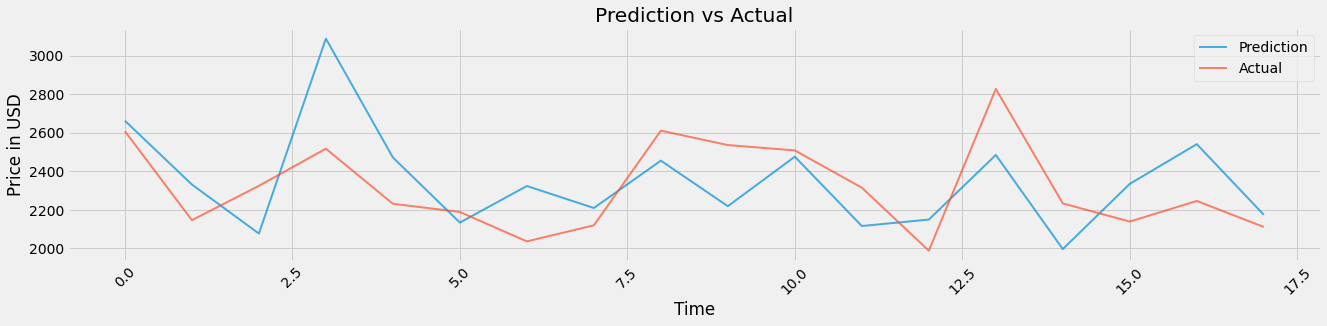

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(svm_prediction, label ='Prediction', lw=2, alpha = 0.7)
plt.plot(y_test, label ='Actual', lw=2, alpha = .7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation = 45)
plt.show()
